# PCA (Core)

Reducción de Dimensionalidad

## Descripción:

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

## Instrucciones:

### 1. Carga de datos:

* Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
* El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

### 2. Exploración y preprocesamiento de datos:

* Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
* Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

### 3. Aplicaciones del PCA:

* Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
* Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

### 4. Interpretación de los componentes principales:

* Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
* Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

### 5. Visualización y comparación:

* Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
* Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

# Resolución

## 1. Carga de Datos:

In [25]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/red-wine-quality-cortez-et-al-2009" (use force=True to force download)


In [26]:
import pandas as pd


camino_ds = "../data/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Verificamos columnas booleanas

In [27]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Columnas convertidas a booleanas: []


Verificamos la columnas numéricas

In [28]:
columnas_flotantes = df.select_dtypes(include="float64")

columnas_convertidas_a_entero = []


def _convertir_a_entero(x):
    if not x.is_integer():
        raise ValueError(f"Valor {x} no es entero")
    return int(x)


for columna in columnas_flotantes:
    datos_columna = df[columna]

    try:
        datos_columna.apply(_convertir_a_entero)
        print(f"Columna '{columna}' es entera. Se procede a convertirla.")
        df[columna] = df[columna].astype("int64")
        columnas_convertidas_a_entero.append(columna)
    except Exception:
        print(f"Columna '{columna}' no es entera. Se mantiene como está.")


print("\n")
print(f"Columnas convertidas a entero: {str(columnas_convertidas_a_entero)}")

Columna 'fixed acidity' no es entera. Se mantiene como está.
Columna 'volatile acidity' no es entera. Se mantiene como está.
Columna 'citric acid' no es entera. Se mantiene como está.
Columna 'residual sugar' no es entera. Se mantiene como está.
Columna 'chlorides' no es entera. Se mantiene como está.
Columna 'free sulfur dioxide' no es entera. Se mantiene como está.
Columna 'total sulfur dioxide' no es entera. Se mantiene como está.
Columna 'density' no es entera. Se mantiene como está.
Columna 'pH' no es entera. Se mantiene como está.
Columna 'sulphates' no es entera. Se mantiene como está.
Columna 'alcohol' no es entera. Se mantiene como está.


Columnas convertidas a entero: []


Verificamos consistencia en variables numéricas.

In [29]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
fixed acidity,1599.0,4.60000,15.90000,8.319637,1.741096,7.90000,0.209276
volatile acidity,1599.0,0.12000,1.58000,0.527821,0.179060,0.52000,0.339244
citric acid,1599.0,0.00000,1.00000,0.270976,0.194801,0.26000,0.718888
residual sugar,1599.0,0.90000,15.50000,2.538806,1.409928,2.20000,0.555351
chlorides,1599.0,0.01200,0.61100,0.087467,0.047065,0.07900,0.538095
free sulfur dioxide,1599.0,1.00000,72.00000,15.874922,10.460157,14.00000,0.658911
total sulfur dioxide,1599.0,6.00000,289.00000,46.467792,32.895324,38.00000,0.707917
density,1599.0,0.99007,1.00369,0.996747,0.001887,0.99675,0.001893
pH,1599.0,2.74000,4.01000,3.311113,0.154386,3.31000,0.046627
sulphates,1599.0,0.33000,2.00000,0.658149,0.169507,0.62000,0.257551


No se visualizan datos fuera de rango.

Verificamos valores duplicados.

In [30]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 240


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


## 2. Exploración y preprocesamiento de datos:

### Histogramas

In [33]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas


columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

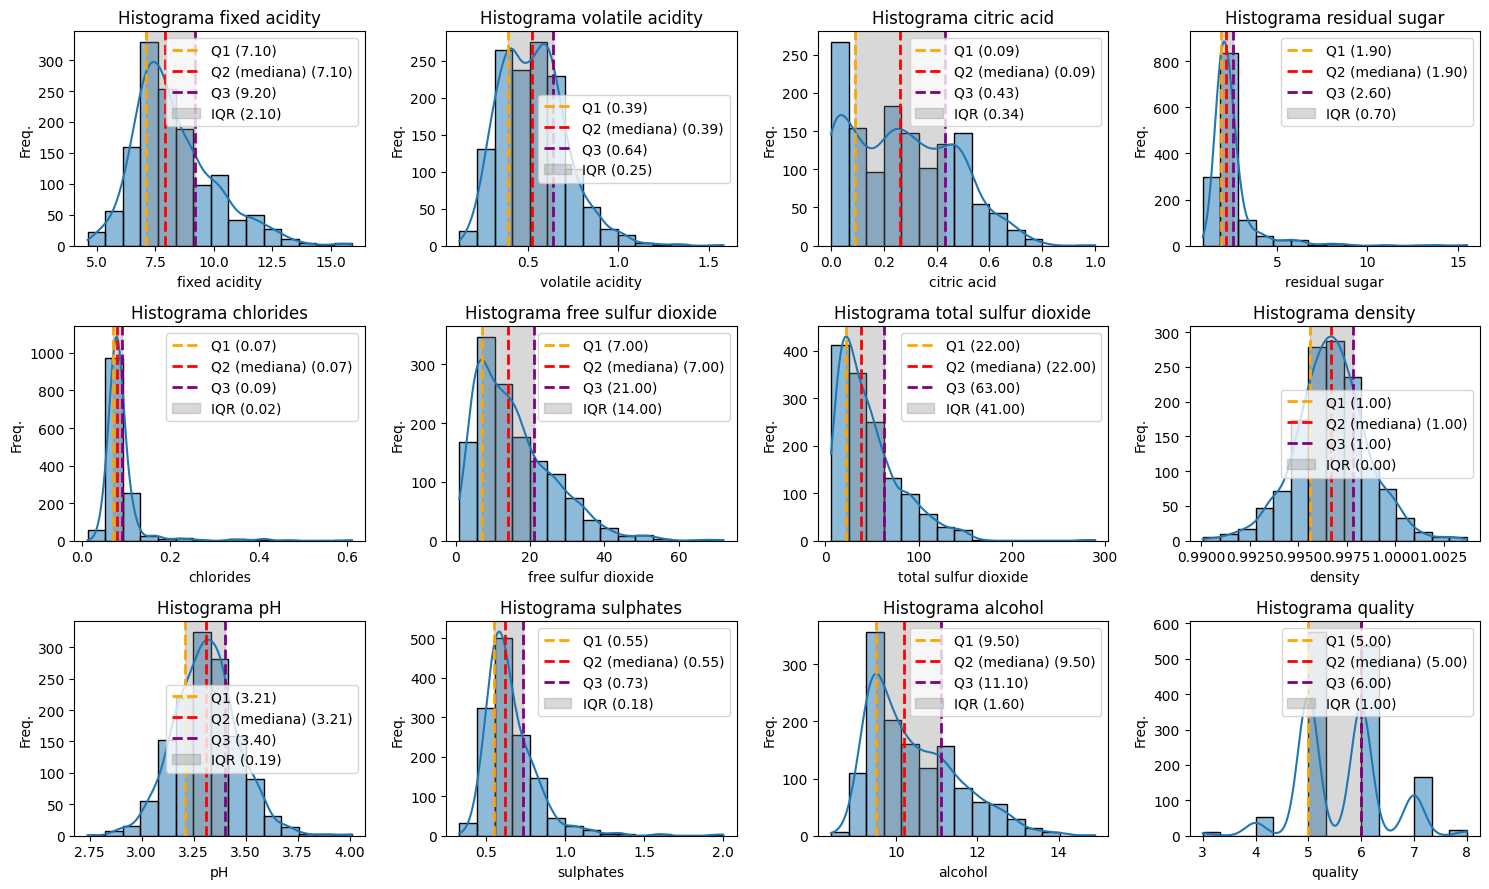

In [34]:
graficar_histogramas(df, columnas_numericas, nro_columnas=4, kde=True, bins=15, figsize=(15, 9))

De los gráficos podemos destacar:

- La mayoría de columnas posee distribución cercana a la normal, con a excepción de total sulfur dioxide.
- Posiblemente existan muchos outliers ya que los rangos intercuartiles son pequeños para las variables.
- Se puede notar un desbalanceo de datos en la variable a predecir quality ya que hay una mayor cantidad de muestras en las clases 5 y 6.

### Boxplots

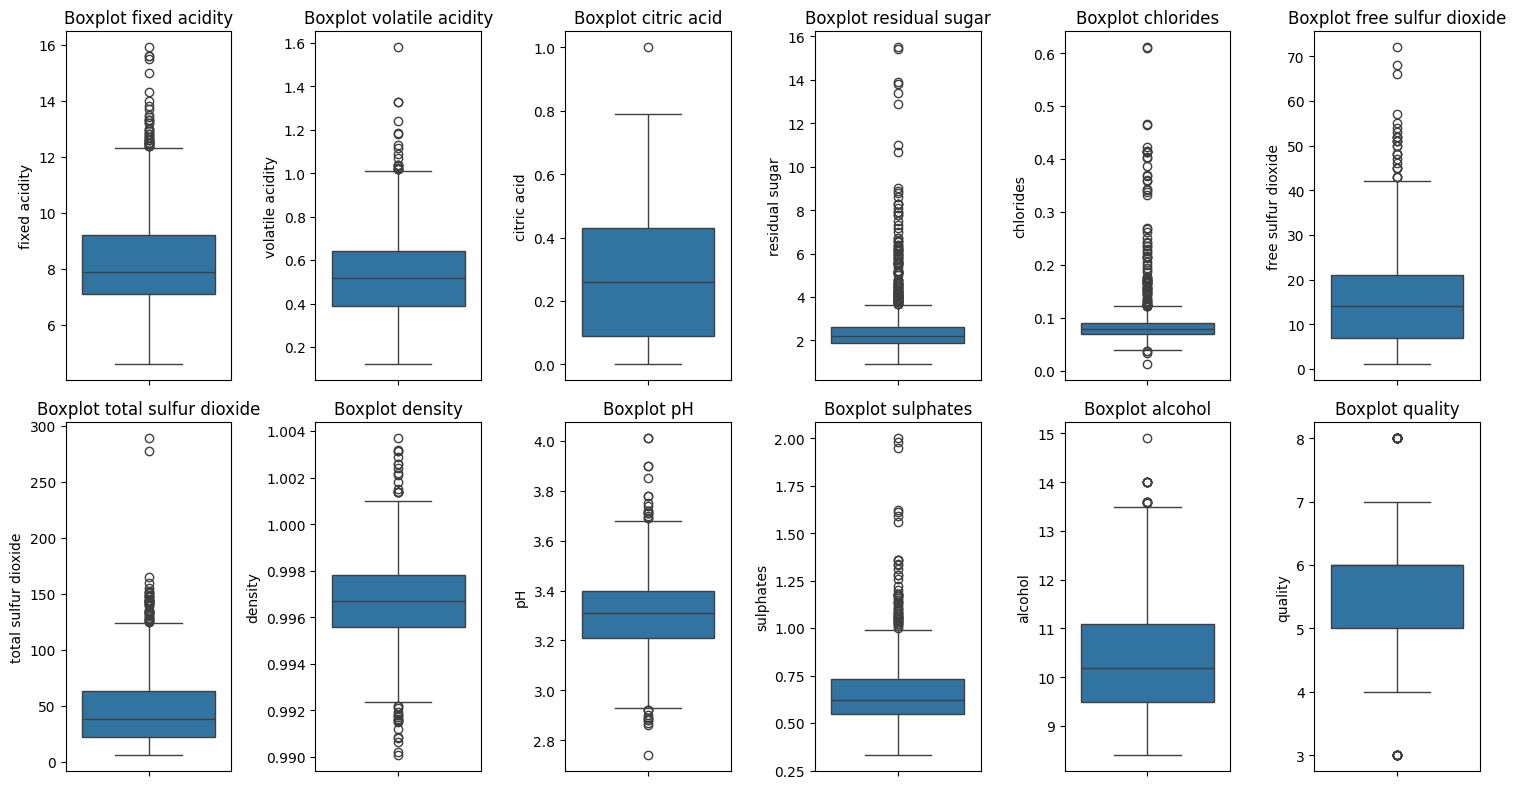

In [36]:
from utils.eda_utils import graficar_boxplots

graficar_boxplots(df, columnas_numericas, nro_columnas=6, figsize=(15, 8))

De los gráficos podemos destacar:

- Existen muchos outliers en la mayoría de las columnas, lo que se debe tener en cuenta al realizar el escalamiento.
- Se puede visualizar en el boxplot de quality que la mediana está muy hacia la clase 6, lo que refuerza la conclusión previa del desbalanceo de datos observado en el histograma.

### Gráficos de dispersión

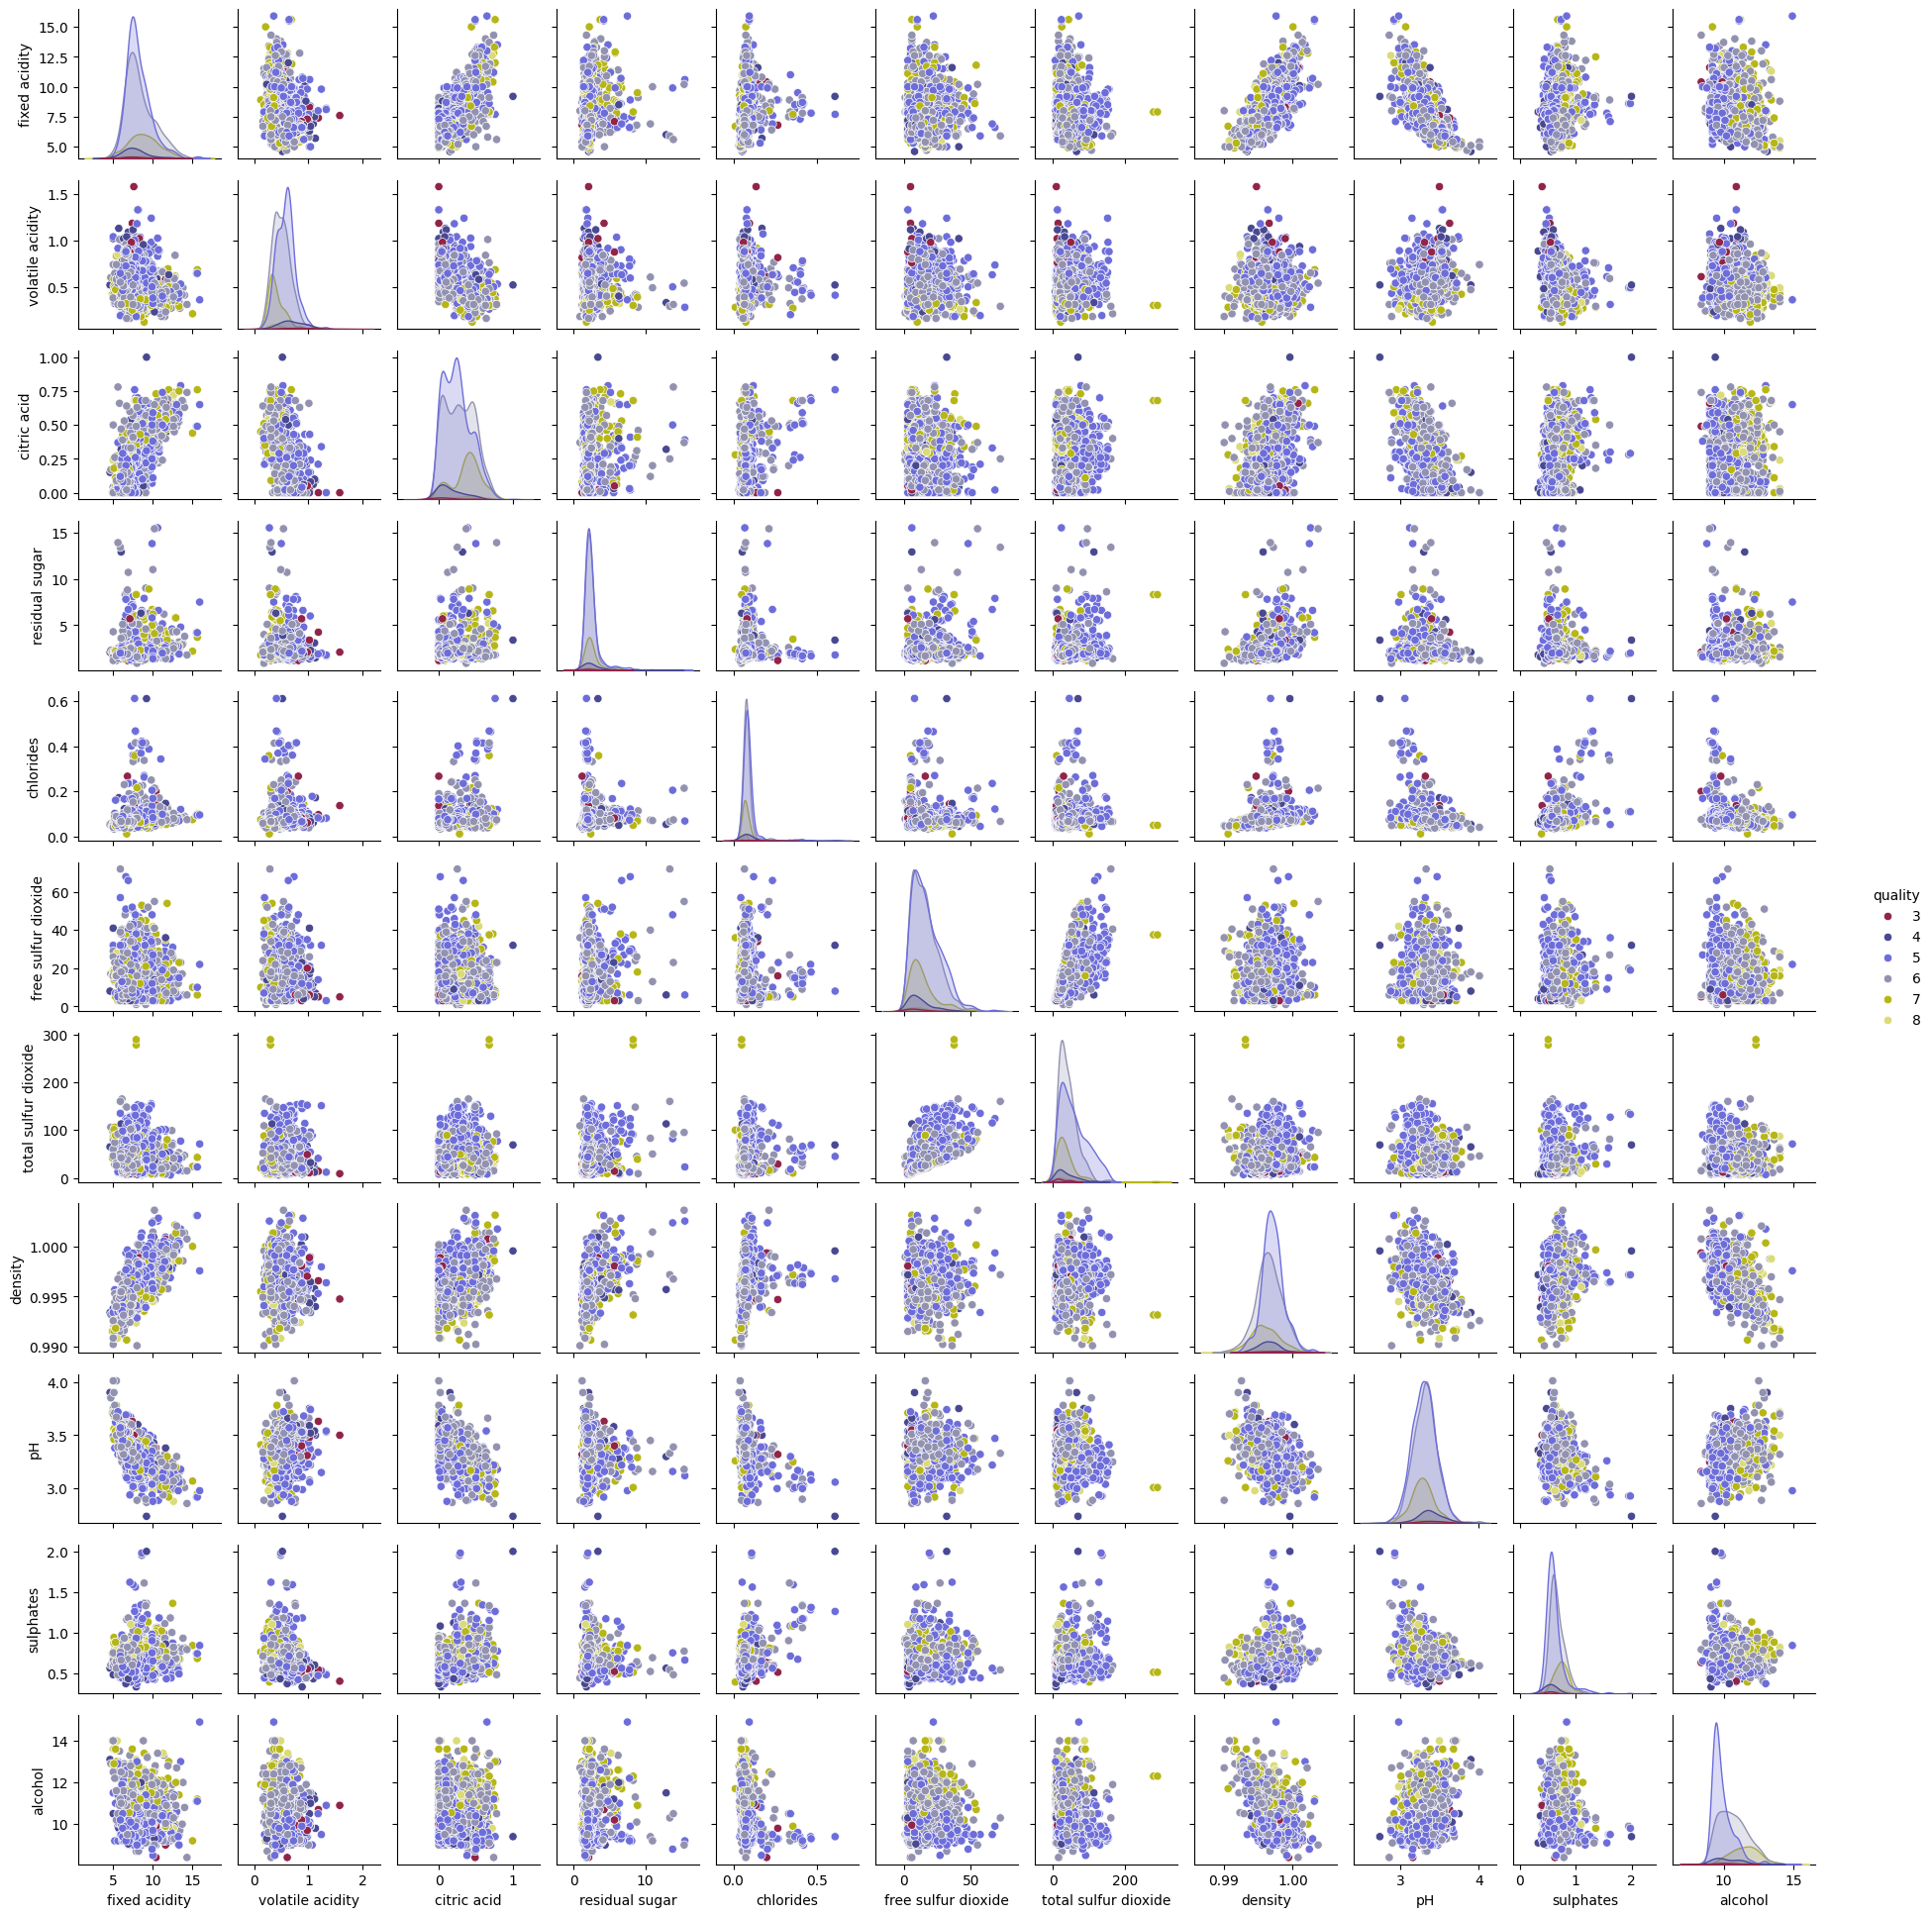

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("gist_stern")
g = sns.pairplot(df[[*columnas_numericas]], hue="quality", height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(20, 20)
plt.show()

### Mapa de correlación

In [ ]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas, figsize=(12, 10))